In [2]:
## Problem statement
# Predict the depth of groundwater of aquifer located in Petrignano

In [258]:
## Load libraries
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [259]:
## Load dataset
#
dataset = pd.read_csv('dataset/Aquifer_Petrignano.csv')
print("Total dataset lines {}".format(len(dataset)))
dataset.head()

Total dataset lines 5223


,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [260]:
## Drop unwanted columns and columns
# we need to remove first lines till 2009 because there is no data available
dataset = dataset.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis = 1)
dataset = dataset[1024:]
print("Total dataset lines {}".format(len(dataset)))
dataset.head()

Total dataset lines 4199


,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
1024,01/01/2009,0.0,-31.14,5.2,-24530.688,2.4
1025,02/01/2009,0.0,-31.11,2.3,-28785.888,2.5
1026,03/01/2009,0.0,-31.07,4.4,-25766.208,2.4
1027,04/01/2009,0.0,-31.05,0.8,-27919.296,2.4
1028,05/01/2009,0.0,-31.01,-1.9,-29854.656,2.3


In [261]:
## Rename column names
names = ['Date', 'Rainfall', 'Depth_to_Groundwater','Temperature', 'Drainage_Volume', 'River_Hydrometry']
dataset.columns = names
dataset.head()


,Date,Rainfall,Depth_to_Groundwater,Temperature,Drainage_Volume,River_Hydrometry
1024,01/01/2009,0.0,-31.14,5.2,-24530.688,2.4
1025,02/01/2009,0.0,-31.11,2.3,-28785.888,2.5
1026,03/01/2009,0.0,-31.07,4.4,-25766.208,2.4
1027,04/01/2009,0.0,-31.05,0.8,-27919.296,2.4
1028,05/01/2009,0.0,-31.01,-1.9,-29854.656,2.3


In [262]:
## Divide into independent and dependent variables
independent_var = ['Date', 'Rainfall', 'Temperature', 'Drainage_Volume', 'River_Hydrometry']
dependent_var = ['Depth_to_Groundwater']

target = dataset[dependent_var]
features = dataset[independent_var]
features.head()


,Date,Rainfall,Temperature,Drainage_Volume,River_Hydrometry
1024,01/01/2009,0.0,5.2,-24530.688,2.4
1025,02/01/2009,0.0,2.3,-28785.888,2.5
1026,03/01/2009,0.0,4.4,-25766.208,2.4
1027,04/01/2009,0.0,0.8,-27919.296,2.4
1028,05/01/2009,0.0,-1.9,-29854.656,2.3


In [263]:
## Check datatype
#
features.dtypes

Date                 object
Rainfall            float64
Temperature         float64
Drainage_Volume     float64
River_Hydrometry    float64
dtype: object

In [264]:
## Convert Date into date type
#
from datetime import date, datetime
features.Date = pd.to_datetime(features.Date, format = '%d/%m/%Y')
features.dtypes

Date                datetime64[ns]
Rainfall                   float64
Temperature                float64
Drainage_Volume            float64
River_Hydrometry           float64
dtype: object

In [265]:
## Check missing values
#
features.isna().sum()

Date                0
Rainfall            0
Temperature         0
Drainage_Volume     1
River_Hydrometry    0
dtype: int64

In [266]:
## Missing values
#
features.Drainage_Volume = features.Drainage_Volume.fillna(features.Drainage_Volume.mean())
# features.Drainage_Volume = features.Drainage_Volume.fillna(features.Drainage_Volume.mode()[0])
features.isna().sum()

Date                0
Rainfall            0
Temperature         0
Drainage_Volume     0
River_Hydrometry    0
dtype: int64

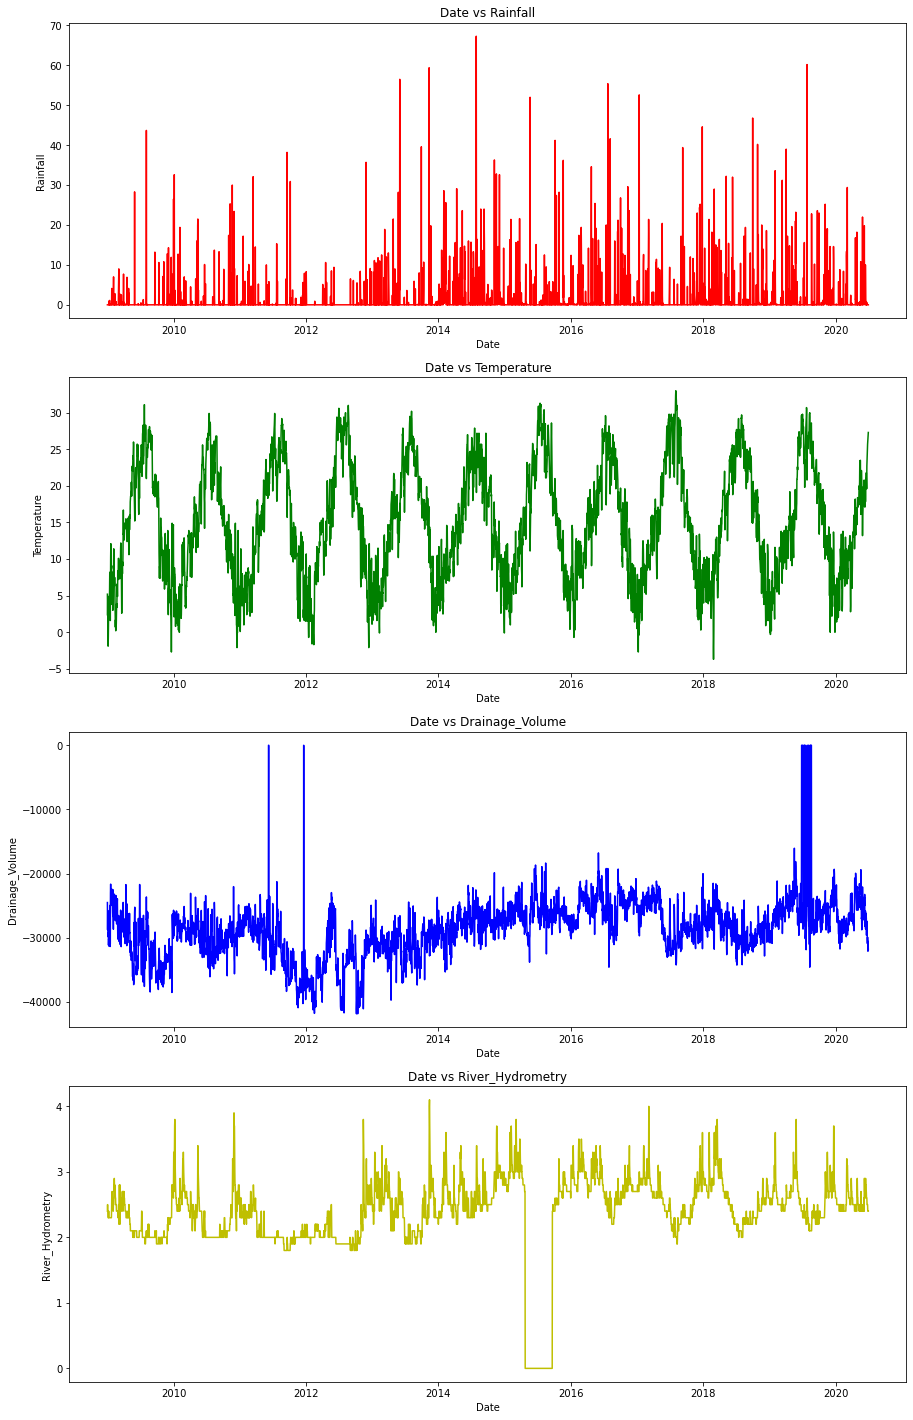

<Figure size 1440x576 with 0 Axes>

In [267]:
## Visualize the features and target
# River hydrometry vs date
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 25))
plt.figure(figsize = (20, 8))

ax[0].plot(features.Date, features.Rainfall, color = 'r')
ax[0].set(xlabel = 'Date', ylabel = 'Rainfall')
ax[0].set(title = 'Date vs Rainfall')

ax[1].plot(features.Date, features.Temperature, color = 'g')
ax[1].set(xlabel = 'Date', ylabel = 'Temperature')
ax[1].set(title = 'Date vs Temperature')

ax[2].plot(features.Date, features.Drainage_Volume, color = 'b')
ax[2].set(xlabel = 'Date', ylabel = 'Drainage_Volume')
ax[2].set(title = 'Date vs Drainage_Volume')

ax[3].plot(features.Date, features.River_Hydrometry, color = 'y')
ax[3].set(xlabel = 'Date', ylabel = 'River_Hydrometry')
ax[3].set(title = 'Date vs River_Hydrometry')

plt.show()
plt.close()



In [276]:
ts = pd.concat([features.Date, target], axis = 1)
ts.head()

,Date,Depth_to_Groundwater
1024,2009-01-01,-31.14
1025,2009-01-02,-31.11
1026,2009-01-03,-31.07
1027,2009-01-04,-31.05
1028,2009-01-05,-31.01


In [277]:
ts.Depth_to_Groundwater = ts.Depth_to_Groundwater.fillna(ts.Depth_to_Groundwater.mean())
ts.isna().sum()

Date                    0
Depth_to_Groundwater    0
dtype: int64

In [278]:
ts.Depth_to_Groundwater = ts.Depth_to_Groundwater.abs()
ts

,Date,Depth_to_Groundwater
1024,2009-01-01,31.14
1025,2009-01-02,31.11
1026,2009-01-03,31.07
1027,2009-01-04,31.05
1028,2009-01-05,31.01
...,...,...
5218,2020-06-26,25.07
5219,2020-06-27,25.11
5220,2020-06-28,25.19
5221,2020-06-29,25.18


In [279]:
ts.dtypes

Date                    datetime64[ns]
Depth_to_Groundwater           float64
dtype: object

In [280]:
con = ts.Date
ts['Date'] = pd.to_datetime(ts.Date)
ts.set_index('Date', inplace = True)
ts

,Depth_to_Groundwater
Date,
2009-01-01,31.14
2009-01-02,31.11
2009-01-03,31.07
2009-01-04,31.05
2009-01-05,31.01
...,...
2020-06-26,25.07
2020-06-27,25.11
2020-06-28,25.19


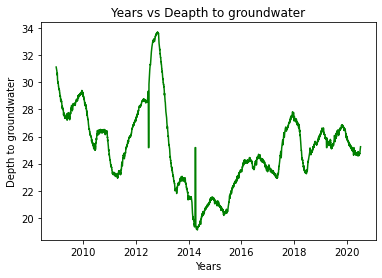

In [283]:
## Visualize
# Data vs Depth_to_Groundwater
plt.plot(ts, color = 'g')
plt.xlabel('Years')
plt.ylabel('Depth to groundwater')
plt.title('Years vs Deapth to groundwater')
plt.show()
plt.close()

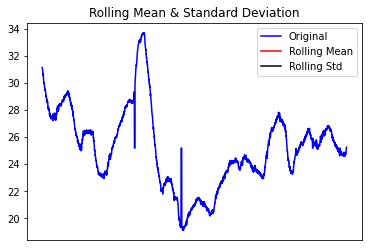

Results of Dickey-Fuller Test
Test Statistic                   -2.090045
p-value                           0.248536
#Lags Used                       29.000000
Number of Observations Used    4169.000000
Critical Value (1%)              -3.431920
Critical Value (5%)              -2.862234
Critical Value (10%)             -2.567139
dtype: float64


In [285]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries.any()).rolling(window=12, center = False).mean()
    rolstd = pd.Series(timeseries.any()).rolling(window=12, center = False).std()
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_stationarity(ts1)

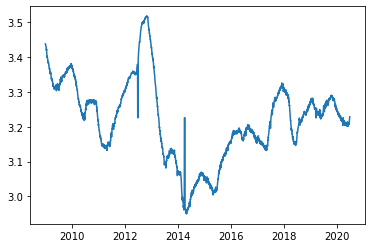

In [288]:
ts_log = np.log(ts)
plt.plot(ts_log)
plt.show()
plt.close()

In [289]:
ts_log_diff = ts_log - ts_log.shift()
ts_lof_diff

,Depth_to_Groundwater
Date,
2009-01-01,NaN
2009-01-02,NaN
2009-01-03,NaN
2009-01-04,NaN
2009-01-05,NaN
...,...
2020-06-26,NaN
2020-06-27,NaN
2020-06-28,NaN


D:\Private\Ana_installed_here\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Private\Ana_installed_here\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


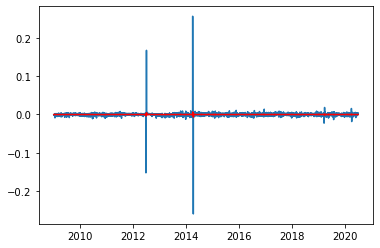

In [290]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log, order = (2, 1, 0))
result_AR = model.fit(disp =-1)
plt.plot(ts_log_diff)
plt.plot(result_AR.fittedvalues , color = 'red')
plt.show()
plt.close()


In [ ]:
!jupyter nbconvert --to script 

In [ ]:
## End
#